# Artificial Neural Networks Mini-project: Tic Tac Toe

In [94]:
from agent import *
import matplotlib.pyplot as plt
from utils import *
from tic_env import *

### Table of Contents
* [Q-Learning](#chapter2) 
    * [2.1. Learning from experts](#chapter21) 
     ([Q1](#chapterq1), [Q2](#chapterq2), [Q3](#chapterq3), [Q4](#chapterq4), [Q5](#chapterq5), [Q6](#chapterq6))
    * [2.2. Learning by self-practice](#chapter22)
    ([Q7](#chapterq7), [Q8](#chapterq8), [Q9](#chapterq9), [Q10](#chapterq10))
* [Deep Q-Learning](#chapter3)
    * [3.1. Learning from experts](#chapter31)
    ([Q11](#chapterq11), [Q12](#chapterq12), [Q13](#chapterq13), [Q14](#chapterq14), [Q15](#chapterq15))
    * [3.2. Learning by self-practice](#chapter32)
    ([Q16](#chapterq16), [Q17](#chapterq17), [Q18](#chapterq18), [Q19](#chapterq19))
* [Comparing Q-Learning with Deep Q-Learning](#chapter4)
    ([Q20](#chapterq20), [Q21](#chapterq21))


## Q-Learning <a id="chapter2"></a>

### 2.1. Learning from experts <a id="chapter21"></a>

##### Question 1 <a class="anchor" id="chapterq1"></a>

##### Question 2 <a class="anchor" id="chapterq2"></a>

##### Question 3 <a class="anchor" id="chapterq3"></a>

##### Question 4 <a class="anchor" id="chapterq4"></a>

##### Question 5 <a class="anchor" id="chapterq5"></a>

##### Question 6 <a class="anchor" id="chapterq6"></a>

### 2.2. Learning by self-practice <a class="anchor" id="chapter22"></a>

##### Question 7 <a class="anchor" id="chapterq7"></a>

##### Question 8 <a class="anchor" id="chapterq8"></a>

##### Question 9 <a class="anchor" id="chapterq9"></a>

##### Question 10 <a class="anchor" id="chapterq10"></a>

## Deep Q-Learning <a class="anchor" id="chapter3"></a>

### 3.1. Learning from experts <a class="anchor" id="chapter31"></a>

##### Question 11 <a class="anchor" id="chapterq11"></a>

In [138]:
agent = DeepAgent(epsilon=0.1)
opponent = OptimalPlayer(0.5)
history = agent.learn(opponent, N=20000, test_phase=20000, self_practice=False, save_avg_losses=True)

100%|██████████| 20000/20000 [05:33<00:00, 59.91it/s]


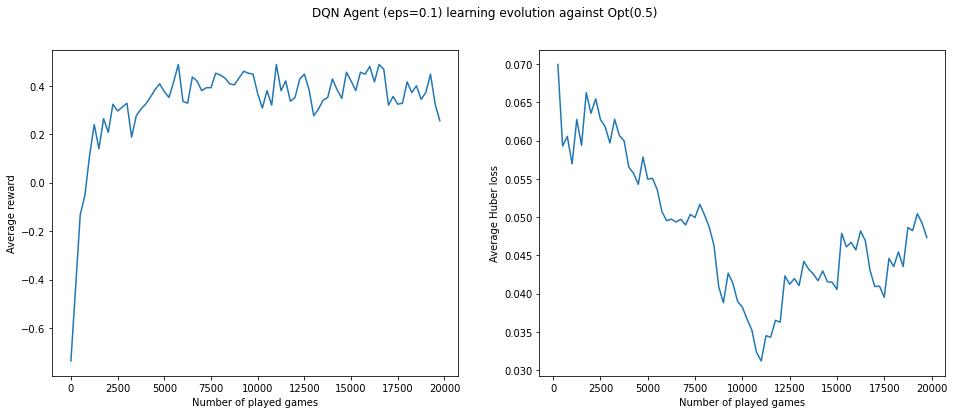

In [141]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
metric = np.mean(np.array(history).reshape(80,250), axis=1)

f.suptitle('DQN Agent (eps=0.1) learning evolution against Opt(0.5)')
ax[0].plot(np.arange(80)*250, metric)
ax[0].set(xlabel="Number of played games", ylabel="Average reward")
ax[1].plot(np.arange(80)*250, agent.avg_losses)
ax[1].set(xlabel="Number of played games", ylabel="Average Huber loss")
plt.show()

##### Question 12 <a class="anchor" id="chapterq12"></a>

In [135]:
agent12 = DeepAgent(epsilon=0.1, buffer=1, batch=1)
opponent = OptimalPlayer(0.5)
history12 = agent12.learn(opponent, N=20000, test_phase=20000, self_practice=False, save_avg_losses=True)

100%|██████████| 20000/20000 [04:32<00:00, 73.40it/s]


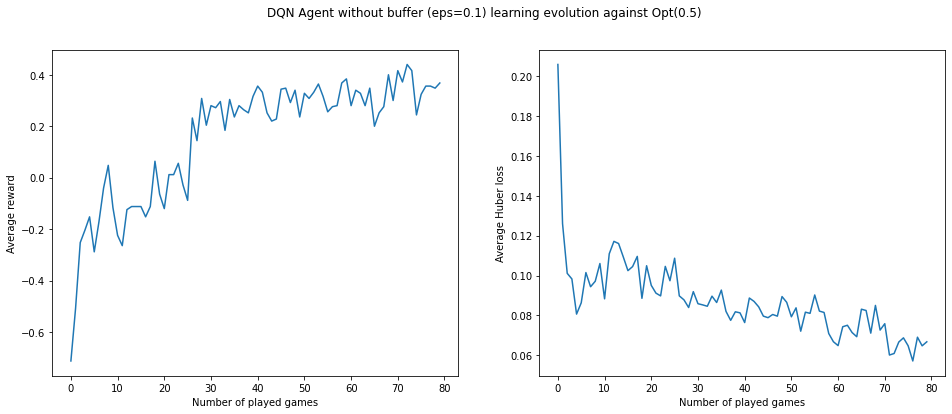

In [137]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
metric = np.mean(np.array(history12).reshape(80,250), axis=1)

f.suptitle('DQN Agent without buffer (eps=0.1) learning evolution against Opt(0.5)')
ax[0].plot(metric)
ax[0].set(xlabel="Number of played games", ylabel="Average reward")
ax[1].plot(agent12.avg_losses)
ax[1].set(xlabel="Number of played games", ylabel="Average Huber loss")
plt.show()

##### Question 13 <a class="anchor" id="chapterq13"></a>

In [ ]:
agents = [DeepAgent(explore=True, n_star=1), DeepAgent(explore=True, n_star=1000), DeepAgent(explore=True, n_star=10000), DeepAgent(explore=True, n_star=20000), DeepAgent(explore=True, n_star=40000)]
all_history = []
opponent = OptimalPlayer(epsilon=0.5)
env = TictactoeEnv()
for agent in agents:
    history = agent.learn(opponent, N=20000, test_phase=250, self_practice=False)
    all_history.append(history)

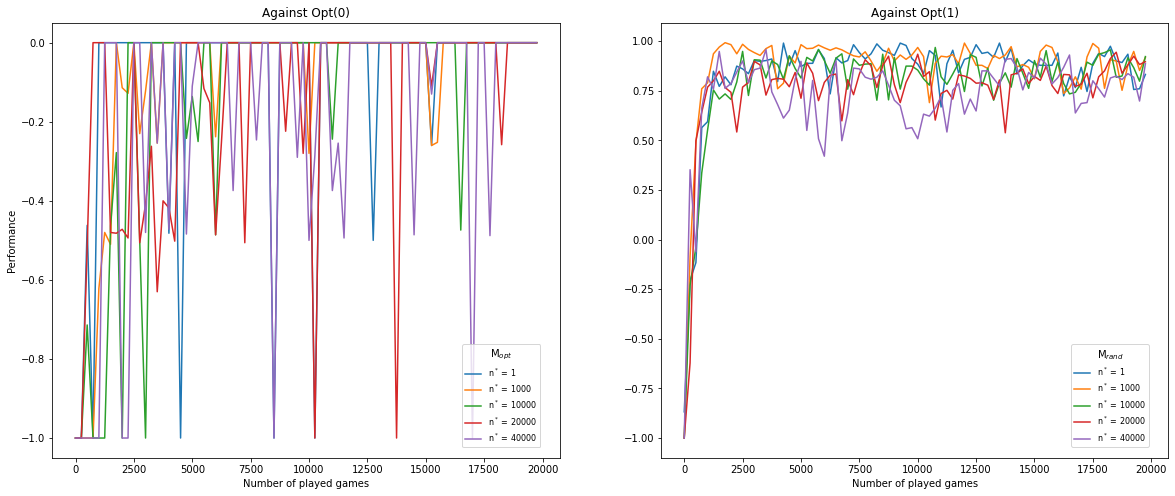

In [152]:
nstar_list = [1, 1000, 10000, 20000, 40000]

m_opts_Q3 = np.zeros((80, len(agents)))
m_rands_Q3 = np.zeros((80, len(agents)))

for i, agent in enumerate(agents):
    m_opts_Q3[:,i], m_rands_Q3[:,i] = agent.m_opts, agent.m_rands

f, ax = plt.subplots(nrows=1, ncols=2, figsize= (20,8))

for i, n_star in enumerate(nstar_list):
    ax[0].plot(np.arange(80)*250, m_opts_Q3[:,i], label=r'n$^*$ = {:.0f}'.format(n_star))
    ax[1].plot(np.arange(80)*250, m_rands_Q3[:,i], label=r'n$^*$ = {:.0f}'.format(n_star))

ax[0].legend(loc='upper left', title=r'M$_{{opt}}$', bbox_to_anchor = (0.8, 0.27), prop={'size': 8}) 
ax[1].legend(loc='upper left', title=r'M$_{{rand}}$', bbox_to_anchor = (0.8, 0.27), prop={'size': 8}) 
ax[0].set(xlabel="Number of played games", ylabel="Performance", title="Against Opt(0)")
ax[1].set(xlabel="Number of played games", title="Against Opt(1)")
plt.show()
plt.show()

##### Question 14 <a class="anchor" id="chapterq14"></a>

In [179]:
agents = [DeepAgent(explore=True, n_star=1000) for _ in range(5)]
opponents = [OptimalPlayer(epsilon=0), OptimalPlayer(epsilon=0.2), OptimalPlayer(epsilon=0.5), OptimalPlayer(epsilon=0.8), OptimalPlayer(epsilon=1)]
opts_Q14 = []
rands_Q14 = []
for i, opponent in enumerate(opponents):
    agents[i].learn(opponent, N=20000, test_phase=250, self_practice=False)
    m_opts, m_rands = agents[i].m_opts, agents[i].m_rands
    opts_Q14.append(m_opts)
    rands_Q14.append(m_rands)

100%|██████████| 20000/20000 [08:06<00:00, 41.15it/s]


[Text(0.5, 1.0, 'Against Opt(1)')]

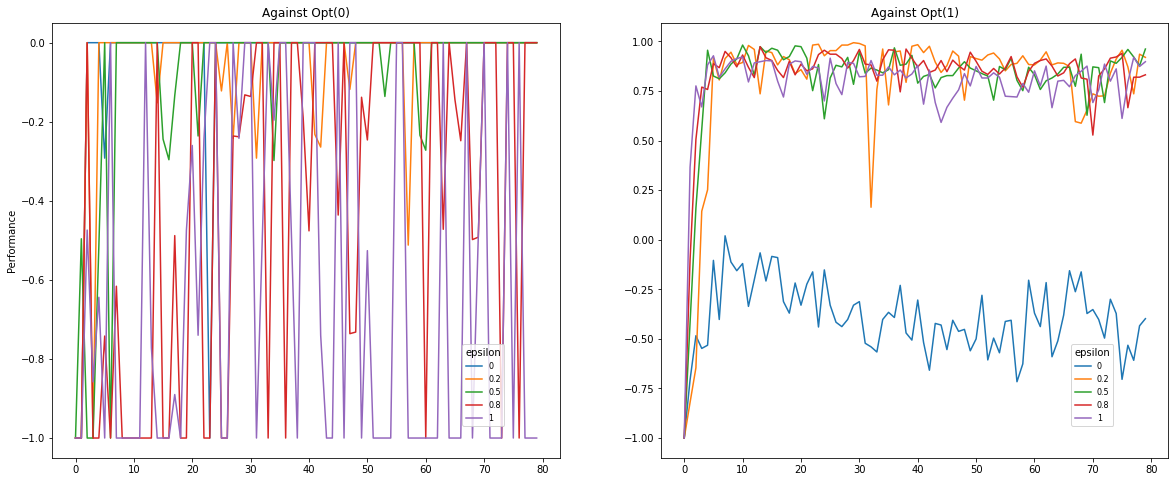

In [180]:
labels = [0, 0.2, 0.5, 0.8, 1]
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
for i in range(5):
    ax[0].plot(opts_Q14[i], label=labels[i])
    ax[1].plot(rands_Q14[i], label=labels[i])
    
ax[0].legend(loc='upper left', title=r'epsilon', bbox_to_anchor = (0.8, 0.27), prop={'size': 8}) 
ax[1].legend(loc='upper left', title=r'epsilon', bbox_to_anchor = (0.8, 0.27), prop={'size': 8}) 
ax[0].set(title='Against Opt(0)', ylabel='Performance')
ax[1].set(title='Against Opt(1)')

##### Question 15 <a class="anchor" id="chapterq15"></a>

In [191]:
max([v for v in agent.m_rands for agent in agents])

0.996

In [192]:
max([v for v in agent.m_opts for agent in agents])

0.0

### Learning by self-practice  <a class="anchor" id="chapterq32"></a>

##### Question 16 <a class="anchor" id="chapterq16"></a>

In [193]:
agents16 = [DeepAgent(epsilon=e) for e in [0, 0.2, 0.5, 0.8, 1]]
opts_Q16 = []
rands_Q16 = []
for i, agent in enumerate(agents16):
    agent.learn(opponent, N=20000, test_phase=250, self_practice=True)
    m_opts, m_rands = agent.m_opts, agent.m_rands
    opts_Q16.append(m_opts)
    rands_Q16.append(m_rands)

100%|██████████| 20000/20000 [16:40<00:00, 20.00it/s]  


AttributeError: 'list' object has no attribute 'm_rands'

In [ ]:
labels = [0, 0.2, 0.5, 0.8, 1]
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
for i in range(5):
    ax[0].plot(opts_Q16[i], label=labels[i])
    ax[1].plot(rands_Q16[i], label=labels[i])
    
ax[0].legend(loc='upper left', title=r'epsilon', bbox_to_anchor = (0.8, 0.27), prop={'size': 8}) 
ax[1].legend(loc='upper left', title=r'epsilon', bbox_to_anchor = (0.8, 0.27), prop={'size': 8}) 
ax[0].set(title='Against Opt(0)', ylabel='Performance')
ax[1].set(title='Against Opt(1)')

##### Question 17 <a class="anchor" id="chapterq17"></a>

In [ ]:
agents = [DeepAgent(explore=True, n_star=n) for n in [1, 1000, 10000, 20000, 40000]]
opponent = OptimalPlayer(epsilon=0.5)
env = TictactoeEnv()
opts_Q17 = []
rands_Q17 = []
for agent in agents:
    agent.learn(opponent, N=20000, test_phase=250, self_practice=True)
    m_opts, m_rands = agent.m_opts, agent.m_rands
    opts_Q17.append(m_opts)
    rands_Q17.append(m_rands)

##### Question 18 <a class="anchor" id="chapterq18"></a>

##### Question 19 <a class="anchor" id="chapterq19"></a>

## Comparing Q-Learning with Deep Q-Learning <a class="anchor" id="chapter4"></a>

##### Question 20 <a class="anchor" id="chapterq20"></a>

##### Question 21 <a id="chapterq21"></a>